In [1]:
import json
from matplotlib import pyplot as plt
from collections import Counter

In [2]:
tu = json.load(open('../../data/json/depositonce/authors.json'))
hu = json.load(open('../../data/json/edoc/authors.json'))
fu = json.load(open('../../data/json/refubium/authors.json'))
all = tu.copy()
for repo in (hu, fu):
    for k in repo:
        if k in all:
            all[k] += repo[k]
        else:
            all[k] = repo[k]
tu_r = json.load(open('../../data/json/depositonce/authors_reversed.json'))
hu_r = json.load(open('../../data/json/edoc/authors_reversed.json'))
fu_r = json.load(open('../../data/json/refubium/authors_reversed.json'))
all_r = tu.copy()
for repo_r in (hu_r, fu_r):
    for k in repo_r:
        if k in all_r:
            all_r[k] += repo_r[k]
        else:
            all_r[k] = repo_r[k]

In [3]:
tuples = [('depositonce', tu), ('edoc', hu), ('refubium', fu), ('all', all)]
tuples_r = [('depositonce', tu_r), ('edoc', hu_r), ('refubium', fu_r), ('all', all_r)]

In [4]:
print('Total number of authors per repository:')
for tup in tuples:
    print(f'\t{tup[0]}: {len(tup[1])}')

Total number of authors per repository:
	depositonce: 16454
	edoc: 26872
	refubium: 47791
	all: 87989


In [5]:
cnt = sum([len(v) == 0 for v in all.values()])
cnt_r = sum([len(v) == 0 for v in all_r.values()])
print(f'{cnt} authors have authored zero publications (should be zero).')
print(f'{cnt_r} publications don\'t have an author.')

0 authors have authored zero publications (should be zero).
440 publications don't have an author.


In [6]:
def avg(data):
    """ data is a dict with lists as values. Compute the avg. length of those lists. """
    lengths = [len(v) for v in data.values()]
    return round(sum(lengths) / len(lengths), 2)

In [7]:
print('Number of authors per repository:')
for tup in tuples:
    print(f"\t{tup[0]}: {avg(tup[1])}")
print("\nAvg. authors per publication:")
for tup in tuples_r:
    print(f"\t{tup[0]}: {avg(tup[1])}")

Number of authors per repository:
	depositonce: 1.92
	edoc: 1.72
	refubium: 1.52
	all: 1.62

Avg. authors per publication:
	depositonce: 2.37
	edoc: 1.95
	refubium: 2.55
	all: 2.2


In [8]:
def distr(data):
    """ data is a dict with lists as values. Return the count of lengths of those lists. """
    lengths = [len(v) for v in data.values()]
    lengths, cnt = zip(*sorted(Counter(lengths).items()))
    lengths, cnt = list(lengths), list(cnt)
    y = []
    print(sum(cnt))
    i = 0
    while len(cnt) > 0:
        if lengths[0] == i:
            y.append(cnt.pop(0))
            lengths.pop(0)
        else:
            y.append(0)
        i += 1
    return y

87989


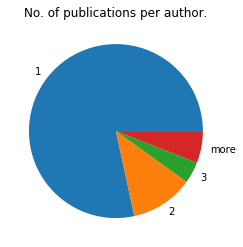

In [9]:
y = distr(all)
wedges = {str(i): y[i] for i in range(1, 4)}
wedges.update({'more': sum(y[4:])})
plt.pie(wedges.values(), labels=wedges.keys())
plt.title('No. of publications per author.')
plt.show()

66959


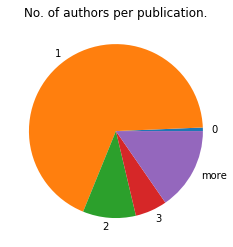

In [12]:
y_r = distr(all_r)
wedges_r = {str(i): y_r[i] for i in range(4)}
wedges_r.update({'more': sum(y_r[4:])})
plt.pie(wedges_r.values(), labels=wedges_r.keys())
plt.title('No. of authors per publication.')
plt.show()

In [13]:
for publication in all_r:
    if len(all_r[publication]) == 0:
        print(publication)

oai:edoc.hu-berlin.de:18452/18543
oai:refubium.fu-berlin.de:fub188/25758
oai:refubium.fu-berlin.de:fub188/24184
oai:refubium.fu-berlin.de:fub188/18438
oai:refubium.fu-berlin.de:fub188/19433
oai:refubium.fu-berlin.de:fub188/24231
oai:refubium.fu-berlin.de:fub188/21867
oai:refubium.fu-berlin.de:fub188/25897
oai:refubium.fu-berlin.de:fub188/18886
oai:refubium.fu-berlin.de:fub188/21697
oai:refubium.fu-berlin.de:fub188/27349
oai:refubium.fu-berlin.de:fub188/21837
oai:refubium.fu-berlin.de:fub188/23804
oai:refubium.fu-berlin.de:fub188/25908
oai:refubium.fu-berlin.de:fub188/16657
oai:refubium.fu-berlin.de:fub188/24384
oai:refubium.fu-berlin.de:fub188/19103
oai:refubium.fu-berlin.de:fub188/21836
oai:refubium.fu-berlin.de:fub188/21863
oai:refubium.fu-berlin.de:fub188/17952
oai:refubium.fu-berlin.de:fub188/26634
oai:refubium.fu-berlin.de:fub188/23823
oai:refubium.fu-berlin.de:fub188/18461
oai:refubium.fu-berlin.de:fub188/19395
oai:refubium.fu-berlin.de:fub188/23862
oai:refubium.fu-berlin.de:fub1

All but one publications with no authors come from refubium. The other one, from edoc, refers to the foundational texts of the university. The ones from refubium don't look like scientific articles, but I have to take a closer look